# Binary Trees: Concepts, Implementation, and Visualization

This notebook provides a comprehensive introduction to binary trees, including their structure, terminology, and common operations such as traversal, insertion, deletion, and search. You will learn how to implement and visualize binary trees in Python, and understand the differences between general binary trees and binary search trees (BSTs).

In [1]:
#| default_exp binary_trees

In [2]:
#| hide
from nbdev.showdoc import *
from fastcore.test import *

In [3]:
#| export
from collections import deque
import matplotlib.pyplot as plt
import networkx as nx
from typing import Callable, Generator

## What is a Binary Tree?

A **binary tree** is a hierarchical data structure in which each node has at most two children, referred to as the left child and the right child. Binary trees are widely used for efficient data storage, searching, and sorting.

**Use cases:**
- Expression parsing
- Hierarchical data representation
- Efficient searching and sorting (e.g., BSTs)

## Node Structure

Each node in a binary tree contains:
- A value (data)
- A reference to the left child (or None)
- A reference to the right child (or None)

Below is a visual representation of a node:

![Figure of a node](https://media.geeksforgeeks.org/wp-content/uploads/20240811023858/Binary-Tree-Representation.webp)

Creating a Node

In [4]:
class Node:
    """A node in a binary tree."""
    def __init__(self, value, left: "Node|None"=None, right: "Node|None"=None):
        self.value = value
        self.left: Node|None = left
        self.right: Node|None = right
    
    def __str__(self) -> str:
        """A string representation of the node including its value, left, and right children."""
        left_value = f"Node({self.left.value})" if self.left else None
        right_value = f"Node({self.right.value})" if self.right else None
        return f"Node({self.value}, left={left_value}, right={right_value})"

    def __repr__(self) -> str:
        return self.__str__()

Creating a binary tree requires creating a set of nodes.

In [5]:
node1 = Node(1)
node1

Node(1, left=None, right=None)

In [6]:
root_node = (
    Node(1,
        Node(2,
            Node(4,
                Node(8),
                Node(9)
            ),
            Node(5,
                Node(10),
                Node(11)
            )
        ),
        Node(3,
            Node(6,
                Node(12),
                Node(13)
            ),
            Node(7,
                Node(14),
                Node(15)
            )
        )
    )
)
root_node

Node(1, left=Node(2), right=Node(3))

## Visualizing a Binary Tree

The function below visualizes a binary tree using NetworkX and Matplotlib. It adapts the layout for larger trees, highlights the root, and provides clear node labels. Optionally, you can display parent pointers or other node attributes by customizing the label logic.

In [7]:
#| export
def visualize_tree(root, show_parents=False):
    """Visualize a binary tree using NetworkX and Matplotlib.
    Args:
        root: The root node of the tree.
        show_parents: If True, include parent values in node labels.
    """
    if not root:
        print("Empty tree")
        return
    import math
    G = nx.DiGraph()
    pos = {}
    labels = {}
    node_id = 0
    node_map = {}
    def add_nodes(node, x=0.0, y=0.0, layer=1):
        nonlocal node_id
        if node:
            current_id = node_id
            node_map[node] = current_id
            node_id += 1
            G.add_node(current_id)
            pos[current_id] = (x, y)
            if show_parents and hasattr(node, 'parent') and node.parent:
                labels[current_id] = f"{node.value}\n(p:{node.parent.value})"
            else:
                labels[current_id] = str(node.value)
            if node.left:
                left_id = node_id
                G.add_edge(current_id, left_id)
                add_nodes(node.left, x - 1/(layer+0.5), y - 1, layer + 1)
            if node.right:
                right_id = node_id
                G.add_edge(current_id, right_id)
                add_nodes(node.right, x + 1/(layer+0.5), y - 1, layer + 1)
            return current_id
    add_nodes(root)
    # Adaptive figure size
    depth = root.height if hasattr(root, 'height') else 3
    width = max(6, 2 ** (depth-1))
    plt.figure(figsize=(width, depth*2))
    # Highlight root
    node_colors = ["#ffcc00" if n == 0 else "#90caf9" for n in G.nodes]
    nx.draw(G, pos, labels=labels, with_labels=True, node_color=node_colors,
            node_size=1200, font_size=14, font_weight='bold', arrows=True, edge_color="#888888")
    plt.title("Binary Tree Visualization")
    plt.axis('off')
    plt.show()

## Binary Tree Terminology

- **Node**: An object with a value, a left child, and a right child.
- **Child**: A left or right node.
- **Parent**: A node that has a child node.
- **Root**: The topmost node in a tree; it does not have a parent.
- **Leaf**: A node with no children.
- **Internal**: A node with at least one child node.
- **Depth**: The number of edges from a node to the root.
- **Height**: The number of edges on the longest path from a node to a leaf.

Example diagram:

        1 (root)
       /   \
      2     3
     / \   / \
    4   5 6   7

- Node 1 is the root.
- Nodes 4, 5, 6, 7 are leaves.
- Node 2 is an internal node.
- The depth of node 4 is 2.
- The height of the tree is 2.

In [8]:
#| export
class Node:
    """A node in a binary tree with parent pointer."""
    __slots__ = ['value', 'parent', 'left', 'right']

    def __init__(self, value, left: "Node|None"=None, right: "Node|None"=None, parent: "Node|None"=None):
        self.value = value
        self.parent: Node|None = parent
        self.left: Node|None = left
        self.right: Node|None = right
    
    def __str__(self) -> str:
        """A string representation of the node including its value, left, right, and parent."""
        left_value = f"Node({self.left.value})" if self.left else None
        right_value = f"Node({self.right.value})" if self.right else None
        parent_value = f"Node({self.parent.value})" if self.parent else None
        return f"Node({self.value}, left={left_value}, right={right_value}, parent={parent_value})"

    def __repr__(self) -> str:
        return self.__str__()

    @property
    def height(self) -> int:
        """Returns the height of the node (longest path to a leaf)."""
        return 1 + max(
            (self.left.height if self.left else 0), (self.right.height if self.right else 0)
        )
    
    @property
    def depth(self) -> int:
        return 0 if self.parent is None else 1 + self.parent.depth

In [9]:
#| export
def set_parents(node: Node, parent: Node|None=None) -> Node:
    """Set parent nodes given a root node."""
    if parent:
        node.parent = parent
    if node.left:
        set_parents(node.left, node)
    if node.right:
        set_parents(node.right, node)
    return node

In [10]:
root_node = set_parents(
    Node(1,
        Node(2,
            Node(4,
                Node(8),
                Node(9)
            ),
            Node(5,
                Node(10),
                Node(11)
            )
        ),
        Node(3,
            Node(6,
                Node(12),
                Node(13)
            ),
            Node(7,
                Node(14),
                Node(15)
            )
        )
    )
)
root_node.parent, root_node.height, root_node.depth


(None, 4, 0)

In [11]:
if root_node.left:
    print(root_node.left, "depth:", root_node.left.depth)

Node(2, left=Node(4), right=Node(5), parent=Node(1)) depth: 1


## Properties of a Binary Tree

- **Maximum nodes**: $2^H - 1$ (where $H$ is the height)
- **Maximum nodes at level $L$**: $2^L$
- **Minimum height for $n$ nodes**: $\lceil \log_2(n+1) \rceil$

These properties help analyze the efficiency of tree operations.

## Operations on a Binary Tree

- **Traversal**: Visiting all nodes in a binary tree.
  - Depth-First Search (DFS):
    - Preorder (node, left, right)
    - Inorder (left, node, right)
    - Postorder (left, right, node)
  - Breadth-First Search (BFS):
    - Level order
- **Insertion**: Adding a new node.
- **Deletion**: Removing a node.
- **Search**: Finding a node with a specific value.

### Traversal

In [12]:
#| export
def create_n_nodes(num=5) -> Node:
    """Creates a perfect binary tree with num nodes."""
    assert num > 0
    nodes = [Node(i) for i in range(num)]
    for i in range(num):
        left_index = 2 * i + 1
        right_index = 2 * i + 2
        if left_index < num:
            nodes[i].left = nodes[left_index]
            nodes[left_index].parent = nodes[i]
        if right_index < num:
            nodes[i].right = nodes[right_index]
            nodes[right_index].parent = nodes[i]
    return nodes[0]  # root node

#### DFS

> Implemented using recursion

In [ ]:
root = create_n_nodes(); assert root

In [ ]:
#| export
def dfs_inorder(node: Node) -> Generator[Node, None, None]:
    """Inorder DFS traversal: left, node, right."""
    if node.left:
        yield from dfs_inorder(node.left)
    yield node
    if node.right:
        yield from dfs_inorder(node.right)


[Node(3, left=None, right=None, parent=Node(1)),
 Node(1, left=Node(3), right=Node(4), parent=Node(0)),
 Node(4, left=None, right=None, parent=Node(1)),
 Node(0, left=Node(1), right=Node(2), parent=None),
 Node(2, left=None, right=None, parent=Node(0))]

In [ ]:
#| export
def dfs_preorder(node: Node) -> Generator[Node, None, None]:
    """Preorder DFS traversal: node, left, right."""
    yield node
    if node.left:
        yield from dfs_preorder(node.left)
    if node.right:
        yield from dfs_preorder(node.right)

[Node(0, left=Node(1), right=Node(2), parent=None),
 Node(1, left=Node(3), right=Node(4), parent=Node(0)),
 Node(3, left=None, right=None, parent=Node(1)),
 Node(4, left=None, right=None, parent=Node(1)),
 Node(2, left=None, right=None, parent=Node(0))]

In [ ]:
#| export
def dfs_postorder(node: Node) -> Generator[Node, None, None]:
    """Postorder DFS traversal: left, right, node."""
    if node.left:
        yield from dfs_postorder(node.left)
    if node.right:
        yield from dfs_postorder(node.right)
    yield node

[Node(3, left=None, right=None, parent=Node(1)),
 Node(4, left=None, right=None, parent=Node(1)),
 Node(1, left=Node(3), right=Node(4), parent=Node(0)),
 Node(2, left=None, right=None, parent=Node(0)),
 Node(0, left=Node(1), right=Node(2), parent=None)]

#### BFS

> Implemented using a queue

In [ ]:
#| export
def bfs(node: Node) -> Generator[Node, None, None]:
    """Breadth-first search (level order traversal)."""
    queue = deque([node])
    while queue:
        node = queue.popleft()
        yield node
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)

[Node(0, left=Node(1), right=Node(2), parent=None),
 Node(1, left=Node(3), right=Node(4), parent=Node(0)),
 Node(2, left=None, right=None, parent=Node(0)),
 Node(3, left=None, right=None, parent=Node(1)),
 Node(4, left=None, right=None, parent=Node(1))]

### Insertion

Insertion uses BFS to find the first node without a left or right child and inserts the new node there. This keeps the tree as balanced as possible (but does not guarantee a balanced tree).

In [18]:
#| export
def insert_node(root: Node, value):
    """Level-order BFS insert. Inserts a new node with the given value."""
    queue = deque([root])
    while queue:
        node = queue.popleft()
        if node.left:
            queue.append(node.left)
        else:
            node.left = Node(value=value, left=None, right=None, parent=node)
            break
        if node.right:
            queue.append(node.right)
        else:
            node.right = Node(value=value, left=None, right=None, parent=node)
            break

In [19]:
root = create_n_nodes(7)
insert_node(root, "new1")
insert_node(root, "new2")
insert_node(root, "new3")
insert_node(root, "new4")

## Search

You can search for a value in a tree using any traversal method. The function below is generic and works with any traversal.

In [20]:
#| export
def search_tree(root: Node, value, traversal_func: Callable[[Node], Generator[Node, None, None]]) -> Node|None:
    """Search for a node with the given value using the specified traversal function."""
    for node in traversal_func(root):
        if node.value == value:
            return node
    else:
        return None

In [21]:
root = create_n_nodes(7)
print(search_tree(root, 1, dfs_inorder))
print(search_tree(root, 2, dfs_preorder))
print(search_tree(root, 3, dfs_postorder))
print(search_tree(root, 4, bfs))
print(search_tree(root, 5, dfs_inorder))

Node(1, left=Node(3), right=Node(4), parent=Node(0))
Node(2, left=Node(5), right=Node(6), parent=Node(0))
Node(3, left=None, right=None, parent=Node(1))
Node(4, left=None, right=None, parent=Node(1))
Node(5, left=None, right=None, parent=Node(2))


## Deletion

Deleting a node requires:
1. Finding the node to delete.
2. Swapping it with the right-most (deepest) node to preserve structure.
3. Removing the right-most node.

> Note: For binary search trees, deletion must preserve the BST property. The method below is for general binary trees.

In [22]:
#| export
def delete_node(root: Node, value=None) -> Node|None:
    """Deletes the node with the given value by swapping with the right-most node."""
    # if root has no children
    if not (root.left or root.right):
        del root
        return None
    # find the deepest node and its parent
    queue: deque[tuple[Node, Node|None]] = deque([(root, None)])
    last_parent = None
    last_node = None
    while queue:
        last_node, last_parent = queue.popleft()
        if last_node.left:
            queue.append((last_node.left, last_node))
        if last_node.right:
            queue.append((last_node.right, last_node))
    # delete the leaf node
    if last_parent:
        if last_parent.right:
            last_parent.right = None
        elif last_parent.left:
            last_parent.left = None
    else:
        raise NotImplementedError("Parent of right-most node not found.")
    # find the node with value == value
    if last_node and root.value == value:
        last_node.left = root.left
        last_node.right = root.right
        del root
        return last_node
    elif not last_node:
        raise NotImplementedError
    target_queue: deque[Node] = deque([root])
    while target_queue:
        node = target_queue.popleft()
        if node.left:
            if node.left is last_node:
                node.left = None
                return root
            elif node.left.value == value:
                node.left = last_node
                last_node.parent = node
                return root
            target_queue.append(node.left)
        if node.right:
            if node.right is last_node:
                node.right = None
                return root
            elif node.right.value == value:
                node.right = last_node
                last_node.parent = node
                return root
            target_queue.append(node.right)
    return root

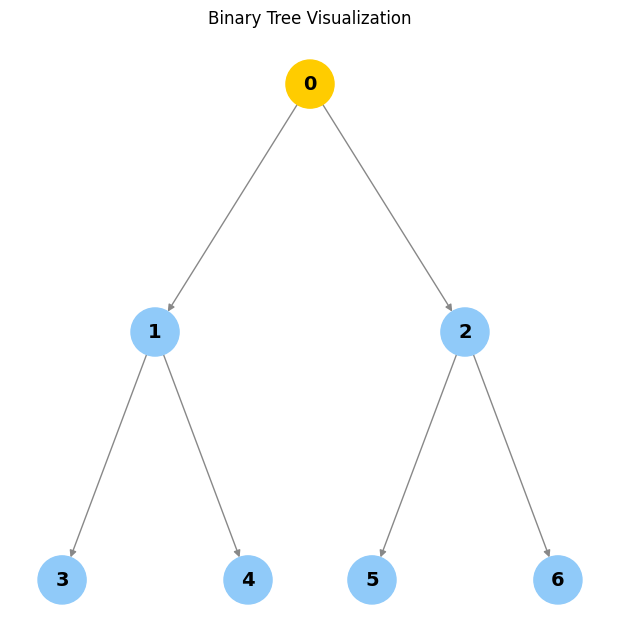

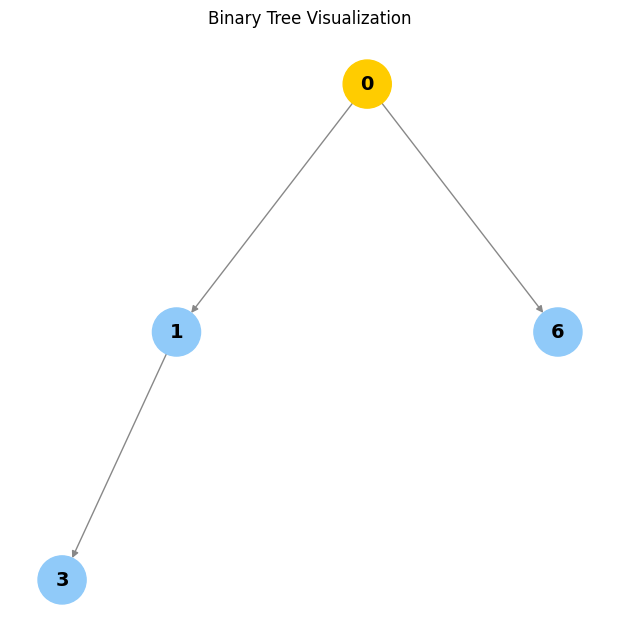

Empty tree


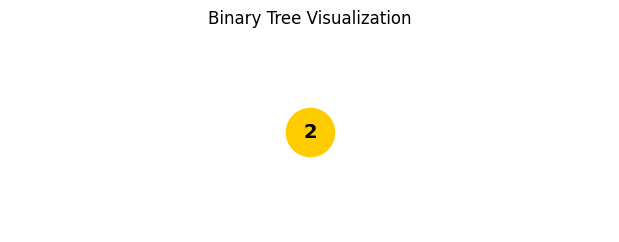

In [23]:
visualize_tree(create_n_nodes(7))
visualize_tree(delete_node(delete_node(create_n_nodes(7), 2), 5))
visualize_tree(delete_node(Node(1), 1))
visualize_tree(delete_node(Node(1, left=Node(2)), 1))

## Types of Binary Trees

- **By children**
  - Full: Every node has 0 or 2 children.
  - Degenerate: Each parent has only one child (like a linked list).
  - Skewed: All nodes are either to the left or right.
- **By levels**
  - Complete: All levels are filled except possibly the last.
  - Perfect: All internal nodes have two children and all leaves are at the same level.
  - Balanced: Height is minimized.
- **By values**
  - Binary search tree (BST)
  - AVL
  - Red Black
  - B, B+
  - Segment

Add diagrams or ASCII art for each type for further clarity.

# Binary Search Trees (BST)

A **binary search tree** is a subtype of binary tree that efficiently stores sorted data.

- The left subtree of a node contains only nodes with keys less than the node's key.
- The right subtree of a node contains only nodes with keys greater than the node's key.
- The left and right subtree each must also be a binary search tree.
- There must be no duplicate nodes (BSTs may have duplicate values with different handling approaches).

**When not to use:**
Use a hash table if all you need is search, insert, and delete, because a hash table does these operations in O(1) time complexity.

**When to use:**
When you need to maintain a traversable, sorted stream of data you can search, insert, delete, ceiling, max, and min in O(h) time, where h is the tree's height. There are subtypes of binary search trees (AVL, Red Black Trees) that minimize height.

> When rolling out a BST in practice, consider AVL and Red Black Trees to optimize operations.

## BST Insertion

When adding a new node, traverse the tree. If the new node's value is greater than the current node, move right; else move left. Once you hit a leaf node, add the node as a child. Duplicate values are not allowed in this implementation.

In [24]:
#| export
def bst_insert(root: Node, new_node: Node) -> None:
    """Insert a new node into a BST. Raises an exception if value exists."""
    if new_node.value < root.value:
        if root.left:
            bst_insert(root.left, new_node)
        else:
            root.left = new_node
            new_node.parent = root
            return
    elif root.value < new_node.value:
        if root.right:
            bst_insert(root.right, new_node)
        else:
            root.right = new_node
            new_node.parent = root
            return
    else:
        raise Exception(f"Value {root.value} already exists in this tree.")

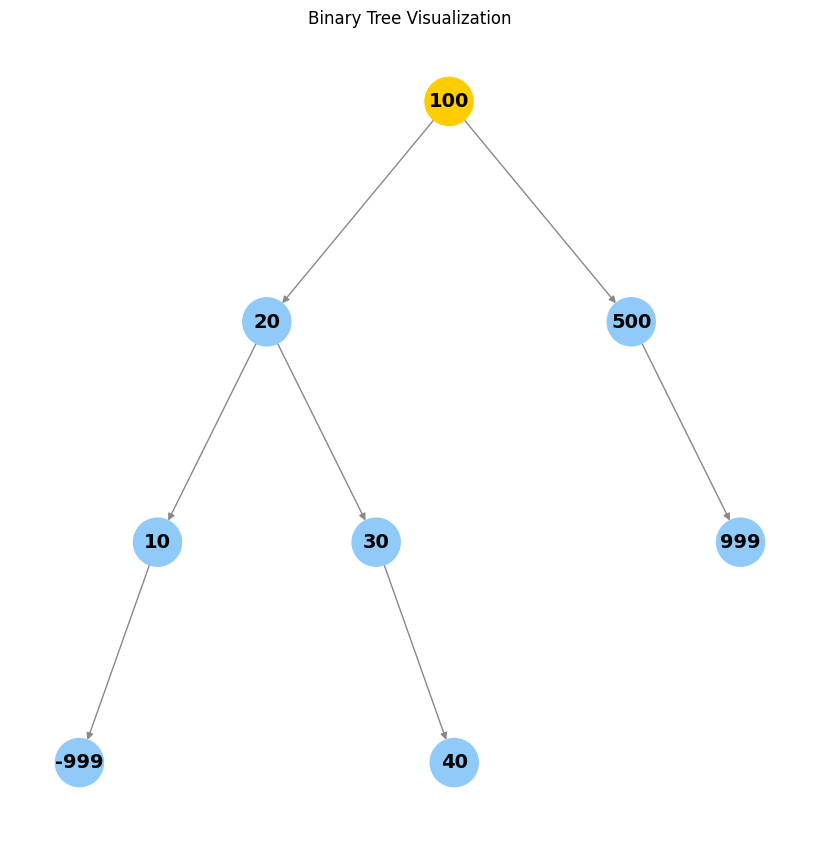

In [25]:
root = set_parents(
    Node(
        100,
        left=Node(
            20,
            left=Node(10),
            right=Node(30),
        ),
        right=Node(500),
    )
)
bst_insert(root, Node(40))
bst_insert(root, Node(999))
bst_insert(root, Node(-999))
visualize_tree(root)
# Uncomment to see exception for duplicate insertion:
# bst_insert(root, Node(30))

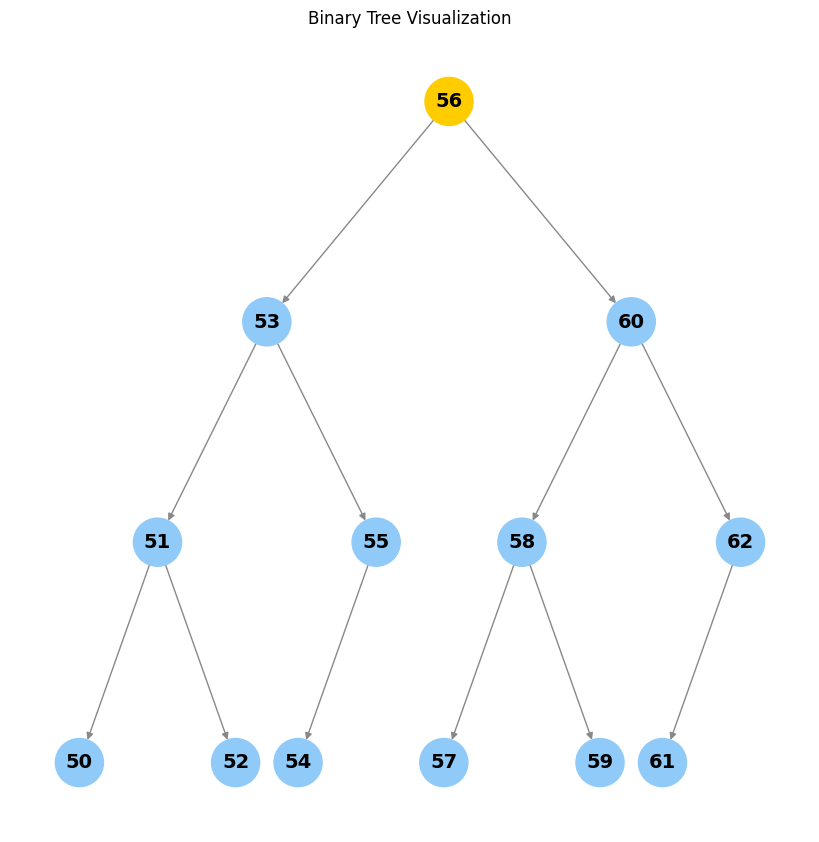

In [26]:
def sorted_list_to_bst(vals) -> Node|None:
    """Given a sorted list, returns the root of a balanced BST."""
    if not vals:
        return None
    mid = len(vals) // 2
    node = Node(vals[mid])
    node.left = sorted_list_to_bst(vals[:mid])
    if node.left:
        node.left.parent = node
    node.right = sorted_list_to_bst(vals[mid+1:])
    if node.right:
        node.right.parent = node
    return node

def generate_balanced_bst(start, n) -> Node|None:
    """Create a balanced BST of values start...start+n-1."""
    return sorted_list_to_bst(list(range(start, start+n)))

r = generate_balanced_bst(50, 13)
assert isinstance(r, Node)
visualize_tree(r)

In [27]:
[i.value for i in dfs_inorder(r)]

[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]

In [28]:
#| export
def bst_search(root: Node|None, key) -> Node:
    """Search for a key in a BST. Raises an exception if not found."""
    if root.value == key:
        return root
    elif key < root.value and root.left:
        return bst_search(root.left, key)
    elif root.right:
        return bst_search(root.right, key)
    else:
        raise Exception(f"Key {key} not found")

In [29]:
bst_search(r, 60)

Node(60, left=Node(58), right=Node(62), parent=Node(56))

## BST Deletion (Overview)

The goal is to delete a node while maintaining order. There are three cases:

1. The node is a leaf node (just remove it).
2. The node has one child (replace it with its child).
3. The node has two children (replace it with its in-order successor or predecessor).

> Implementing full BST deletion is left as an exercise.

In [30]:
#| hide
import nbdev; nbdev.nbdev_export()

# Tests: Node Creation

In [31]:
n = Node(42)
assert n.value == 42
assert n.left is None
assert n.right is None
n2 = Node(1, left=n)
assert n2.left is n
assert n2.right is None

# Tests: Parent Pointer and set_parents

In [32]:
root = Node(1, Node(2), Node(3))
set_parents(root)
assert root.parent is None
assert root.left.parent is root
assert root.right.parent is root

# Tests: __str__ and __repr__

In [33]:
s = str(root)
r = repr(root)
assert "Node(1" in s
assert s == r

# Tests: height and depth

In [34]:
tree = create_n_nodes(7)
set_parents(tree)
assert tree.height == 3
assert tree.left.left.depth == 2

# Tests: Traversals

In [35]:
inorder = [n.value for n in dfs_inorder(tree)]
preorder = [n.value for n in dfs_preorder(tree)]
postorder = [n.value for n in dfs_postorder(tree)]
bfs_order = [n.value for n in bfs(tree)]
assert set(inorder) == set(preorder) == set(postorder) == set(bfs_order) == set(range(7))

# Tests: Insertion

In [36]:
tree2 = create_n_nodes(3)
insert_node(tree2, 99)
# The new node should be a child of one of the leaves
found = False
for n in [tree2.left, tree2.right]:
    if n.left and n.left.value == 99:
        found = True
    if n.right and n.right.value == 99:
        found = True
assert found

# Tests: Search

In [37]:
tree3 = create_n_nodes(5)
assert search_tree(tree3, 2, dfs_inorder).value == 2
assert search_tree(tree3, 99, dfs_inorder) is None

# Tests: Deletion (leaf, one child, root)

In [38]:
t = create_n_nodes(3)
t = delete_node(t, 2)
assert all(n.value != 2 for n in dfs_inorder(t))
t2 = Node(1, Node(2))
t2 = delete_node(t2, 1)
assert t2.value == 2

# Tests: BST insert and search

In [39]:
bst = Node(10)
bst_insert(bst, Node(5))
bst_insert(bst, Node(15))
assert bst.left.value == 5
assert bst.right.value == 15
try:
    bst_insert(bst, Node(5))
    assert False, "Duplicate insert should raise"
except Exception:
    pass
assert bst_search(bst, 15).value == 15
try:
    bst_search(bst, 99)
    assert False, "Search for missing value should raise"
except Exception:
    pass

# Tests: Balanced BST from sorted list

In [40]:
sorted_bst = generate_balanced_bst(0, 7)
assert sorted_bst.value == 3
assert sorted_bst.left.value == 1
assert sorted_bst.right.value == 5
assert [n.value for n in dfs_inorder(sorted_bst)] == list(range(7))

# Tests: Edge cases (single node, empty search)